# Import Modules and Libraries

In [1]:
# import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import median
from scipy import stats
from scipy.stats import randint
import mlxtend

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')


#Stacking
from mlxtend.classifier import StackingClassifier

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Open dataset

In [2]:
#Read File from URL
url = "https://raw.githubusercontent.com/FanaOmar/covid19ML/main/covid19ML.csv"
covid_df = pd.read_csv(url, error_bad_lines=False)

In [3]:
#Read 5 top rows
covid_df.head(5)

,No,Age,Gender,Body temperature,Dry Cough,Sore throat,Weakness,Breathing problem,Drowsiness,Pain in chest,...,Diabetes,Heart disease,Lung disease,Stroke or reduced immunity,Symptoms progressed,High blood pressue,Kidney disease,Change in appetide,Loss of sense of smell,RiskLevel
0,1,20,1,98.6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,19,1,99.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,55,0,102.0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,1
3,4,40,0,100.0,0,0,0,0,1,1,...,1,0,0,0,1,1,0,1,0,2
4,5,33,1,99.2,0,1,0,1,0,0,...,0,0,1,1,1,0,0,0,1,2


In [4]:
#Read 5 bottom rows
covid_df.tail(5)

,No,Age,Gender,Body temperature,Dry Cough,Sore throat,Weakness,Breathing problem,Drowsiness,Pain in chest,...,Diabetes,Heart disease,Lung disease,Stroke or reduced immunity,Symptoms progressed,High blood pressue,Kidney disease,Change in appetide,Loss of sense of smell,RiskLevel
122,123,37,1,102.0,1,1,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
123,124,35,0,100.0,0,0,0,0,1,1,...,1,0,0,0,0,1,0,1,0,1
124,125,22,1,99.2,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,1,1
125,126,29,0,102.0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,1,1,0
126,127,38,0,101.0,1,1,0,1,1,1,...,1,0,0,0,1,1,0,0,0,2


In [5]:
#Describe dataset
covid_df.shape
covid_df.describe()
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 21 columns):
No                                      127 non-null int64
Age                                     127 non-null int64
Gender                                  127 non-null int64
Body temperature                        127 non-null float64
Dry Cough                               127 non-null int64
Sore throat                             127 non-null int64
Weakness                                127 non-null int64
Breathing problem                       127 non-null int64
Drowsiness                              127 non-null int64
Pain in chest                           127 non-null int64
Travel history to infected countries    127 non-null int64
Diabetes                                127 non-null int64
Heart disease                           127 non-null int64
Lung disease                            127 non-null int64
Stroke or reduced immunity              127 non-null int64
Symptoms

# Data Processing/Cleaning

In [6]:
#Drop unwanted column
covid_df = covid_df.drop(['No','Drowsiness','Diabetes','Heart disease'], axis= 1)
covid_df.isnull().sum().max()
covid_df.head(2)

,Age,Gender,Body temperature,Dry Cough,Sore throat,Weakness,Breathing problem,Pain in chest,Travel history to infected countries,Lung disease,Stroke or reduced immunity,Symptoms progressed,High blood pressue,Kidney disease,Change in appetide,Loss of sense of smell,RiskLevel
0,20,1,98.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19,1,99.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
#Drop duplicate
covid_df.drop_duplicates()

,Age,Gender,Body temperature,Dry Cough,Sore throat,Weakness,Breathing problem,Pain in chest,Travel history to infected countries,Lung disease,Stroke or reduced immunity,Symptoms progressed,High blood pressue,Kidney disease,Change in appetide,Loss of sense of smell,RiskLevel
0,20,1,98.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19,1,99.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,55,0,102.0,1,1,1,1,1,0,0,0,0,0,0,1,0,1
3,40,0,100.0,0,0,0,0,1,1,0,0,1,1,0,1,0,2
4,33,1,99.2,0,1,0,1,0,1,1,1,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,37,1,102.0,1,1,1,1,0,0,0,0,1,0,0,1,0,0
123,35,0,100.0,0,0,0,0,1,1,0,0,0,1,0,1,0,1
124,22,1,99.2,0,0,0,1,0,0,0,1,1,0,0,0,1,1
125,29,0,102.0,0,1,1,1,1,0,0,0,0,0,0,1,1,0


In [8]:
covid_df.columns[covid_df.isnull().any()]

Index([], dtype='object')

In [26]:
#Sort Age column into several range
covid_df['Age'].fillna(covid_df['Age'].median(), inplace = True)


new_age = pd.Series(covid_df['Age'])
new_age[new_age<18] = covid_df['Age'].median()
covid_df['Age'] = new_age
new_age = pd.Series(covid_df['Age'])
new_age[new_age>80] = covid_df['Age'].median()
covid_df['Age'] = new_age


covid_df['age_range'] = pd.cut(covid_df['Age'], [0,20,30,65,80], labels=["0-20", "21-30", "31-65", "66-80"], include_lowest=True)
covid_df

,Age,Gender,Body temperature,Dry Cough,Sore throat,Weakness,Breathing problem,Pain in chest,Travel history to infected countries,Lung disease,Stroke or reduced immunity,Symptoms progressed,High blood pressue,Kidney disease,Change in appetide,Loss of sense of smell,RiskLevel,age_range
0,20,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0-20
1,19,1,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0-20
2,55,0,22,1,1,1,1,1,0,0,0,0,0,0,1,0,1,31-65
3,40,0,15,0,0,0,0,1,1,0,0,1,1,0,1,0,2,31-65
4,33,1,11,0,1,0,1,0,1,1,1,1,0,0,0,1,2,31-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,37,1,22,1,1,1,1,0,0,0,0,1,0,0,1,0,0,31-65
123,35,0,15,0,0,0,0,1,1,0,0,0,1,0,1,0,1,31-65
124,22,1,11,0,0,0,1,0,0,0,1,1,0,0,0,1,1,21-30
125,29,0,22,0,1,1,1,1,0,0,0,0,0,0,1,1,0,21-30


# Data Encoding

In [27]:
lb_make = preprocessing.LabelEncoder()

In [28]:
labelDict = {}
for feature in covid_df.select_dtypes(include=['int'
                                                , 'category', 'float']):
    le = preprocessing.LabelEncoder()
    le.fit(covid_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    covid_df[feature] = le.transform(covid_df[feature])

 # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)


label_age_range ['0-20', '21-30', '31-65', '66-80']


In [19]:
covid_df.dtypes

Age                                     int64
Gender                                  int64
Body temperature                        int64
Dry Cough                               int64
Sore throat                             int64
Weakness                                int64
Breathing problem                       int64
Pain in chest                           int64
Travel history to infected countries    int64
Lung disease                            int64
Stroke or reduced immunity              int64
Symptoms progressed                     int64
High blood pressue                      int64
Kidney disease                          int64
Change in appetide                      int64
Loss of sense of smell                  int64
RiskLevel                               int64
age_range                               int64
dtype: object

# Covariance Matrix

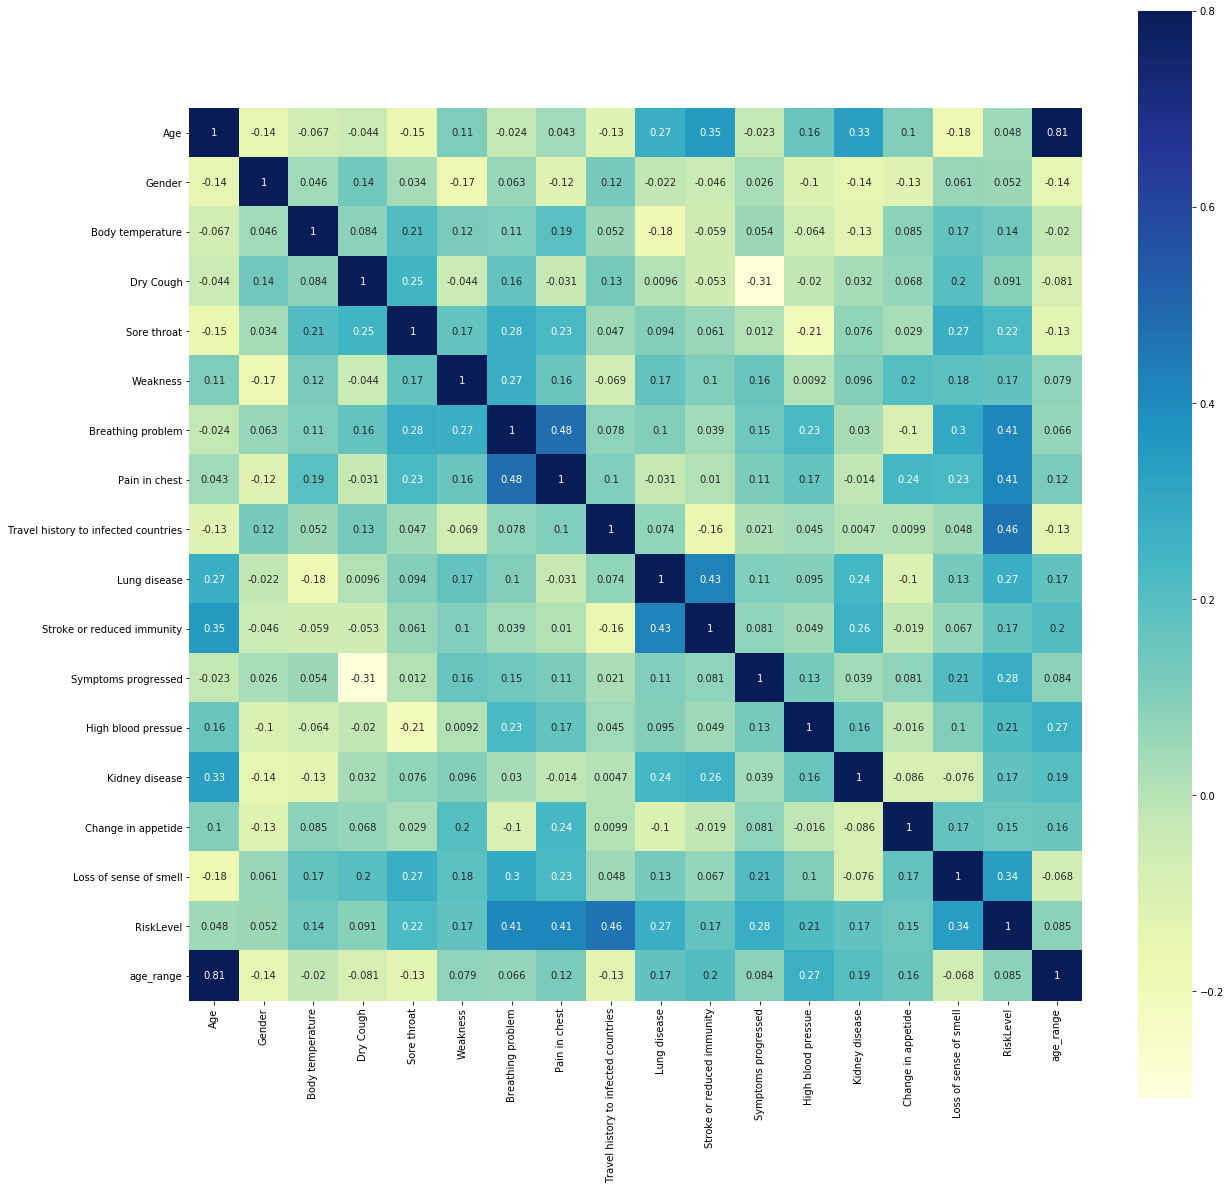

In [14]:
#Summary of the relationship between variables
corrmat = covid_df.corr()
fig, axe = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="YlGnBu", annot = True);
plt.show()

# Data Visualisation

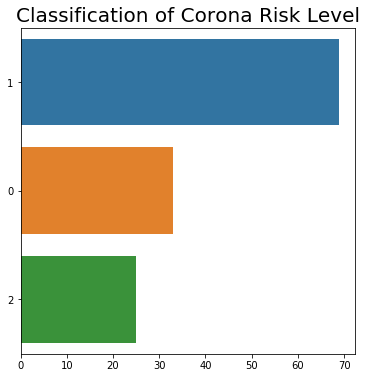

In [15]:
plt.figure(figsize=(6, 6))
sns.countplot(y='RiskLevel', order = covid_df['RiskLevel'].value_counts().index, data=covid_df)
plt.title('Classification of Corona Risk Level', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

Text(0.5, 0, 'Age')

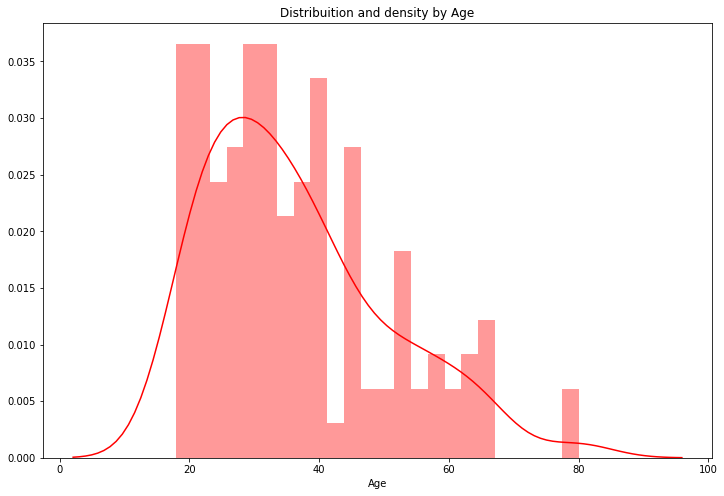

In [20]:
#Distribution and density by Age
plt.figure(figsize=(12,8))
sns.distplot(covid_df["Age"], bins=24, color='r')
plt.title("Distribuition and density by Age")
plt.xlabel("Age")

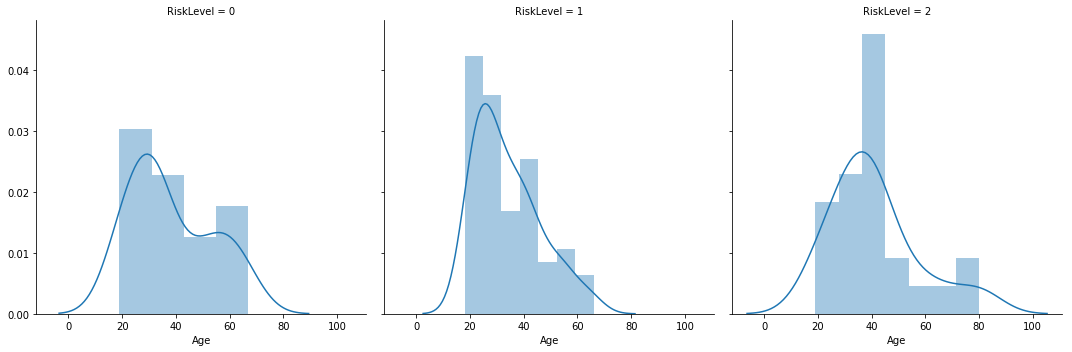

In [21]:
g = sns.FacetGrid(covid_df, col='RiskLevel', size=5)
g = g.map(sns.distplot, "Age")

In [30]:
# Scaling Age as it different from other
scaler = MinMaxScaler()
covid_df['Age'] = scaler.fit_transform(covid_df[['Age']])
covid_df.head()

,Age,Gender,Body temperature,Dry Cough,Sore throat,Weakness,Breathing problem,Pain in chest,Travel history to infected countries,Lung disease,Stroke or reduced immunity,Symptoms progressed,High blood pressue,Kidney disease,Change in appetide,Loss of sense of smell,RiskLevel,age_range
0,0.032258,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.016129,1,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.596774,0,22,1,1,1,1,1,0,0,0,0,0,0,1,0,1,2
3,0.354839,0,15,0,0,0,0,1,1,0,0,1,1,0,1,0,2,2
4,0.241935,1,11,0,1,0,1,0,1,1,1,1,0,0,0,1,2,2


In [31]:
# define X and y
selected_cols = ['Age', 'Gender', 'Body temperature', 'Dry Cough', 'Sore throat', 'Weakness', 'Breathing problem', 'Pain in chest',
                 'Travel history to infected countries', 'Lung disease', 'Stroke or reduced immunity', 'Symptoms progressed', 'High blood pressue',
                 'Kidney disease', 'Change in appetide', 'Loss of sense of smell']
X = covid_df[selected_cols]
Y = covid_df.RiskLevel

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=1) 

1. feature 8 (0.127821)
2. feature 0 (0.101588)
3. feature 1 (0.089356)
4. feature 7 (0.083916)
5. feature 2 (0.076967)
6. feature 6 (0.067388)
7. feature 10 (0.058658)
8. feature 15 (0.053761)
9. feature 4 (0.052243)
10. feature 11 (0.048310)
11. feature 12 (0.047522)
12. feature 5 (0.040632)
13. feature 13 (0.038973)
14. feature 14 (0.038323)
15. feature 9 (0.037758)
16. feature 3 (0.036785)


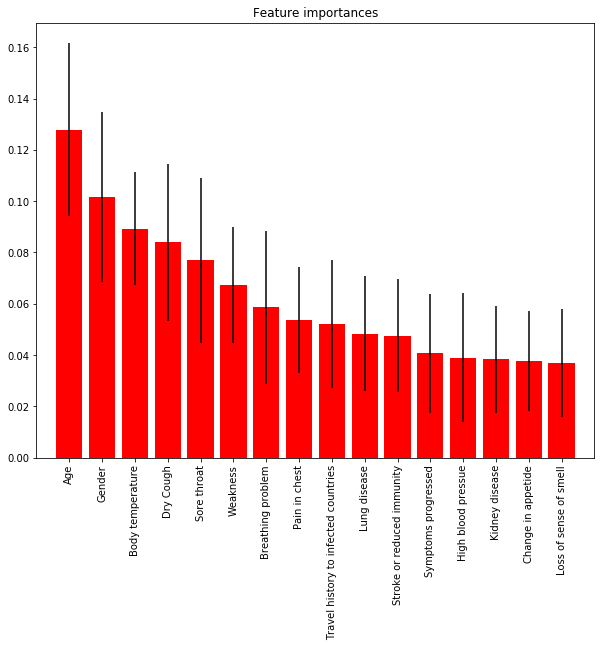

In [32]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, Y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(selected_cols[f])
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure(figsize=(10,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

In [33]:
# Calculating the best parameters
tree = DecisionTreeClassifier()

In [34]:
# train a decision tree model on the training set
tree = DecisionTreeClassifier(max_depth=4, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [35]:
y_pred = tree.predict(X_test) 
print("Predicted values:") 
print(y_pred) 

Predicted values:
[0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 2 1 1 2 1 0 0 1
 0 1]


In [36]:
print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 

Confusion Matrix:  [[ 7  3  0]
 [ 7 14  1]
 [ 1  5  1]]


In [37]:
print ("Accuracy : ", 
    accuracy_score(y_test,y_pred))

Accuracy :  0.5641025641025641


In [38]:
print("Report : ", 
    classification_report(y_test, y_pred))

Report :                precision    recall  f1-score   support

           0       0.47      0.70      0.56        10
           1       0.64      0.64      0.64        22
           2       0.50      0.14      0.22         7

    accuracy                           0.56        39
   macro avg       0.53      0.49      0.47        39
weighted avg       0.57      0.56      0.54        39



# Logistic Regression

In [39]:
sns.set()
#Logistic Regression
from sklearn.datasets import make_classification

In [40]:
# define X and y for LR
selected_cols = ['Age', 'Gender', 'Body temperature', 'Dry Cough', 'Sore throat', 'Weakness', 'Breathing problem', 'Pain in chest',
                 'Travel history to infected countries', 'Lung disease', 'Stroke or reduced immunity', 'Symptoms progressed', 'High blood pressue',
                 'Kidney disease', 'Change in appetide', 'Loss of sense of smell']
X = covid_df[selected_cols]
Y = covid_df.RiskLevel

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=1) 

In [41]:
#trying logistic regression different way
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
y_predicted = model.predict(X_test)
print('Logistic Regression result')
model.score(X_test,y_test)

Logistic Regression result


0.6410256410256411

In [43]:
print('co-effecient:')
print(model.coef_)
print('intercept:')
print(model.intercept_)

co-effecient:
[[ 0.20171404  0.00162495 -0.03643142  0.07169501 -0.19445382 -0.32654569
  -0.7106155  -0.96364556 -1.53542127 -0.91277314 -0.69852857 -0.56098578
  -0.19957226 -0.65902041 -0.56824352 -0.40669317]
 [-1.01647529  0.01000177  0.01426625 -0.0761143  -0.43547803  0.55085087
  -0.03803887  0.29266042  0.48546276  0.09184339  0.37256561 -0.0810148
   0.03451036 -0.31650082 -0.21500374 -0.0287101 ]
 [ 0.81476125 -0.01162672  0.02216517  0.00441929  0.62993185 -0.22430518
   0.74865437  0.67098514  1.04995851  0.82092976  0.32596296  0.64200057
   0.1650619   0.97552123  0.78324727  0.43540327]]
intercept:
[ 2.70380222  0.97025171 -3.67405394]


# Random forest

In [44]:
from sklearn import datasets

In [45]:
# defining X and Y
xVar = ['Age', 'Gender', 'Body temperature', 'Dry Cough', 'Sore throat', 'Weakness', 'Breathing problem', 'Pain in chest',
                 'Travel history to infected countries', 'Lung disease', 'Stroke or reduced immunity', 'Symptoms progressed', 'High blood pressue',
                 'Kidney disease', 'Change in appetide', 'Loss of sense of smell']
X = covid_df[xVar]
Y = covid_df.RiskLevel

In [46]:
# defining training and testing sets where 40% of variables are for testing models
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [47]:
##print train and test group shape
print ('Train group shape:', X_train.shape, y_train.shape)
print ('Test group shape:', X_test.shape, y_test.shape)

Train group shape: (88, 16) (88,)
Test group shape: (39, 16) (39,)


In [48]:
#defining RandomForestClassifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(X_train, y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=1e-07,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [49]:
#Actual vs predicted result
preds = clf.predict(X_test)
pd.crosstab(y_test, preds, rownames=['Actual Result'], colnames=['Predicted Result'])


Predicted Result,0,1,2
Actual Result,,,
0,7,4,0
1,1,18,3
2,0,4,2


In [50]:
##feature important for list
list(zip(X_train, clf.feature_importances_))

[('Age', 0.1517984193820406),
 ('Gender', 0.05435661182258095),
 ('Body temperature', 0.11708245720208987),
 ('Dry Cough', 0.030334516905087434),
 ('Sore throat', 0.05509430772215416),
 ('Weakness', 0.04166628024151233),
 ('Breathing problem', 0.07043585406341428),
 ('Pain in chest', 0.06139277650753772),
 ('Travel history to infected countries', 0.1324293302688369),
 ('Lung disease', 0.03349572974457821),
 ('Stroke or reduced immunity', 0.03006698369058041),
 ('Symptoms progressed', 0.056950180439296096),
 ('High blood pressue', 0.0419660979472333),
 ('Kidney disease', 0.037918963706568797),
 ('Change in appetide', 0.031384843409996595),
 ('Loss of sense of smell', 0.05362664694649231)]